# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [76]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
#api test
urlll = f'http://api.openweathermap.org/data/2.5/weather?q=ulaangom&appid={weather_api_key}'
testweather = requests.get(urlll).json()
print(weather_api_key)
print(testweather)


5b6f75b1d57904ce76bcdac2a743a4a9
{'coord': {'lon': 92.0667, 'lat': 49.9811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 253.48, 'feels_like': 253.48, 'temp_min': 253.48, 'temp_max': 253.48, 'pressure': 1045, 'humidity': 95, 'sea_level': 1045, 'grnd_level': 915}, 'visibility': 2679, 'wind': {'speed': 0.93, 'deg': 45, 'gust': 0.45}, 'clouds': {'all': 100}, 'dt': 1734590516, 'sys': {'country': 'MN', 'sunrise': 1734572793, 'sunset': 1734601871}, 'timezone': 25200, 'id': 1515029, 'name': 'Ulaangom', 'cod': 200}


In [78]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []
print(weather_api_key)
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if response.status_code == 200:
            city_weather = response.json()
            #city_weather = requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          })
        else:
            print(f"Error fetching data for {city}: {response.status_code} - {response.text}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

5b6f75b1d57904ce76bcdac2a743a4a9
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | kirensk
Processing Record 3 of Set 1 | shakargarh
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | rezina
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | santa cruz
Processing Record 16 of Set 1 | psebay
Processing Record 17 of Set 1 | xiaoshi
Processing Record 18 of Set 1 | sitangkai
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,-0.91,98,100,5.16,GL,1734590524
1,kirensk,57.7853,108.1119,-19.19,98,25,0.10,RU,1734590525
2,shakargarh,32.2623,75.1668,19.48,20,0,2.96,PK,1734590526
3,puerto natales,-51.7236,-72.4875,4.56,93,100,8.75,CL,1734590528
4,tiksi,71.6872,128.8694,-25.46,98,43,3.10,RU,1734590529


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-0.91,98,100,5.16,GL,1734590524
1,kirensk,57.7853,108.1119,-19.19,98,25,0.10,RU,1734590525
2,shakargarh,32.2623,75.1668,19.48,20,0,2.96,PK,1734590526
3,puerto natales,-51.7236,-72.4875,4.56,93,100,8.75,CL,1734590528
4,tiksi,71.6872,128.8694,-25.46,98,43,3.10,RU,1734590529


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

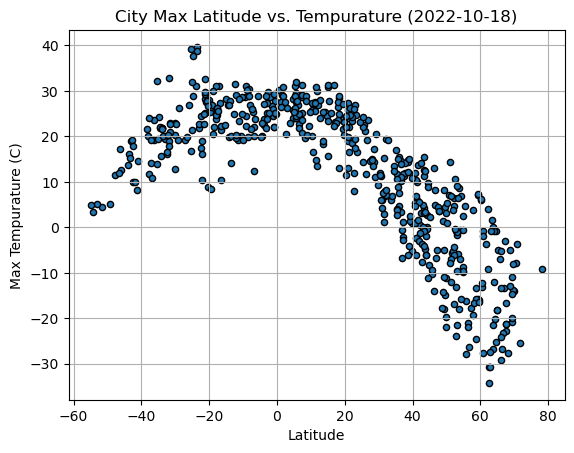

In [83]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter("Lat", "Max Temp", marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Tempurature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

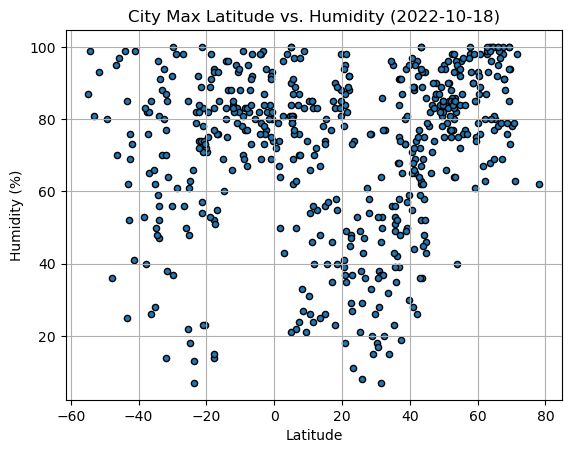

In [84]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

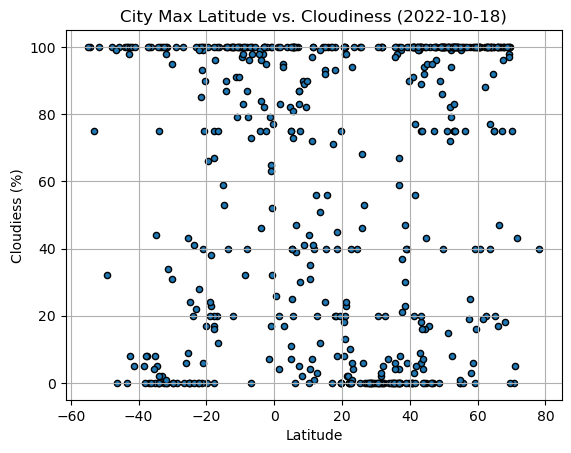

In [85]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness", marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiess (%)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

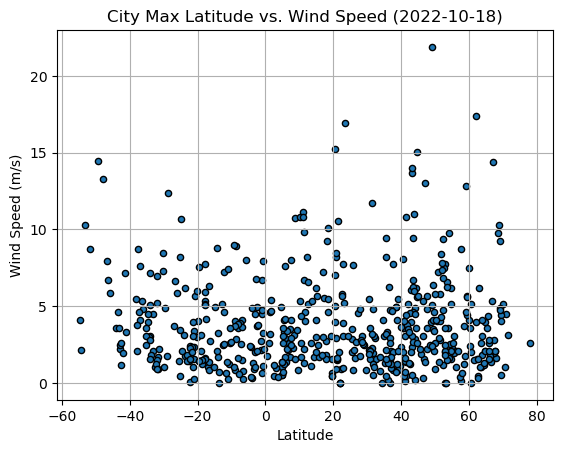

In [86]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter("Lat", "Wind Speed", marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
#regression_line = slope * x_value + intercept

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-0.91,98,100,5.16,GL,1734590524
1,kirensk,57.7853,108.1119,-19.19,98,25,0.10,RU,1734590525
2,shakargarh,32.2623,75.1668,19.48,20,0,2.96,PK,1734590526
4,tiksi,71.6872,128.8694,-25.46,98,43,3.10,RU,1734590529
6,iqaluit,63.7506,-68.5145,-26.84,68,40,1.03,CA,1734590531


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,4.56,93,100,8.75,CL,1734590528
5,waitangi,-43.9535,-176.5597,13.79,99,100,3.58,NZ,1734590530
8,puerto ayora,-0.7393,-90.3518,22.02,93,32,3.25,EC,1734590533
11,port-aux-francais,-49.3500,70.2167,5.15,80,32,14.49,TF,1734590537
13,adamstown,-25.0660,-130.1015,21.43,61,0,3.47,PN,1734590539


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7662631527557233


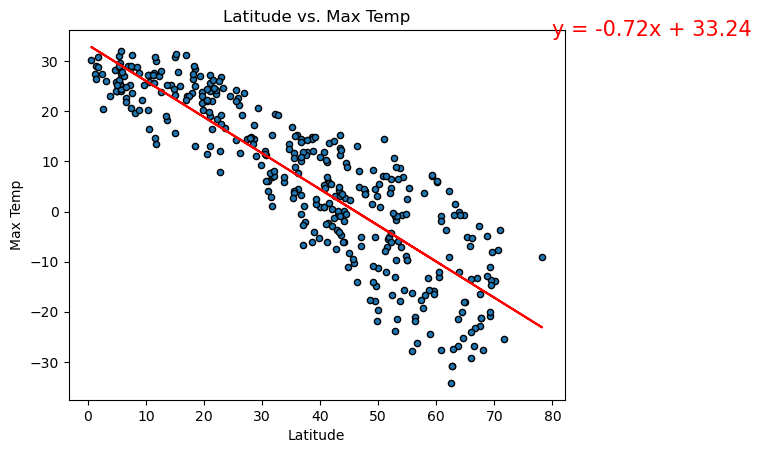

In [90]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter("Lat", "Max Temp", marker="o", edgecolors="black")
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(80,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.28326255537632566


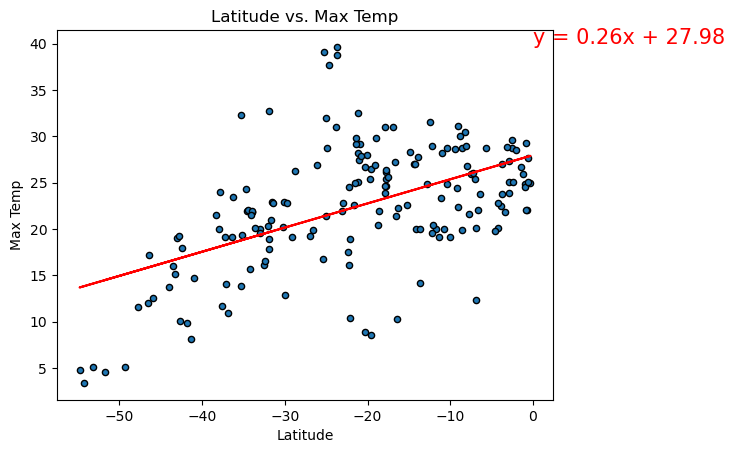

In [91]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter("Lat", "Max Temp", marker="o", edgecolors="black")
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq2,(0,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Starting with the first graph that compares the northern hemisphere vs max temp, we can see that as the latitude increases, the Max temp decreases. We can that it decreases as the regression line of the plot is negative. And seeing that the R^2 value for this graph is 0.77, we can say that the regression line is trustworthy for the most part as there is still some variance. 

In the second graph comparing the southern hemisphere and max temp, we that as the latitude decreases towards the negative, the max temp goes down as well with the help of the regression line. With an R^2 value of 0.28, it means that there is a lot of variance between the Max temp which means the regression line isn't as reliable.

In conclusion, Max temp is highest near or at 0, while Max temp continues to decrease the further it is away from a latitude of 0. There is a correlation between latitude and Max temp, meaning you can make assumption on what the Max Temp could be based on the latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1277062440767949


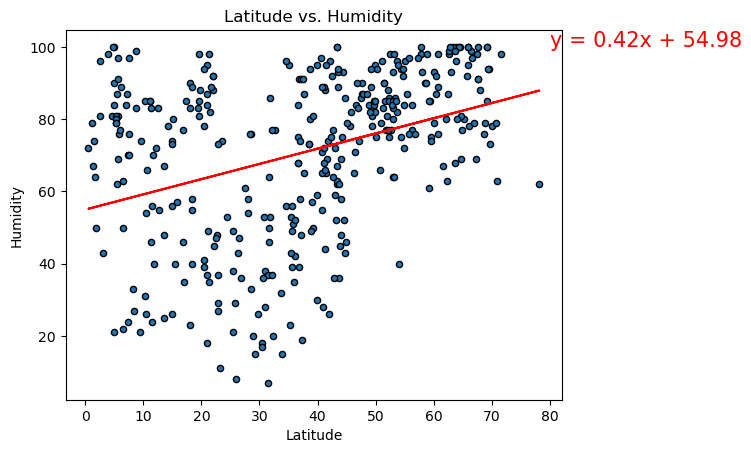

In [92]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black")
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(80,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05431365730563186


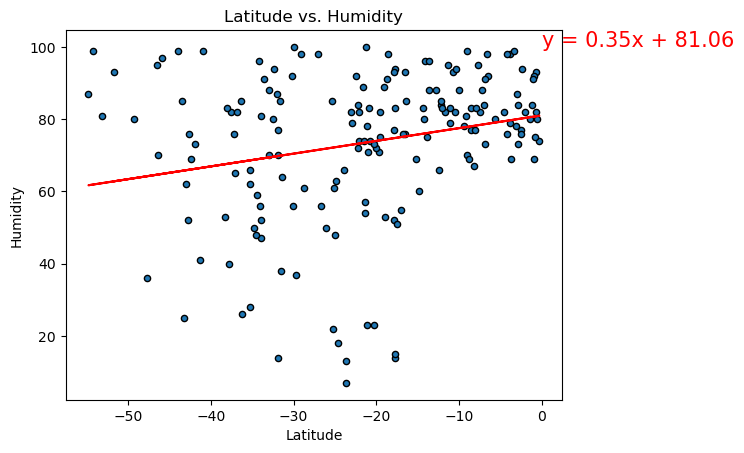

In [93]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black")
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

When looking at both graphs, we can see that there is high variance between each plot points. This high variance is backed up by both plots having a low R^2 of 0.13 and even 0.05. With such high variance, we can determine that there is not much of a correlation between Latitude and humidity in both the Northern or Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.049086912123024594


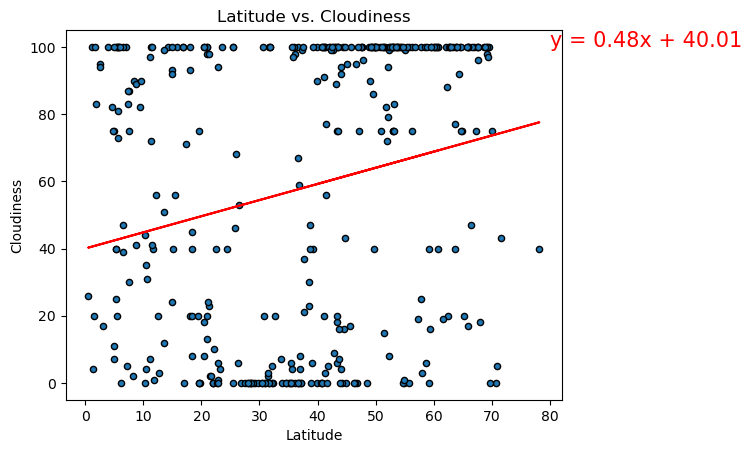

In [94]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter("Lat", "Cloudiness", marker="o", edgecolors="black")
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(80,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05431365730563186


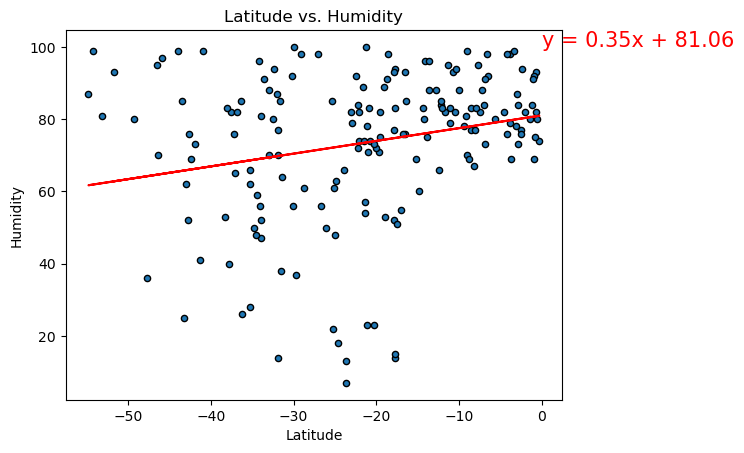

In [95]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black")
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Similarly to the previous linear relationship, we can see that in both graph displaying a linear regression with low R^2 value. Again this means that there is no relationship between the latitude and cloudiness. You won't be able to obtain a certain cloudiness by choosing a specific latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0017683445462710425


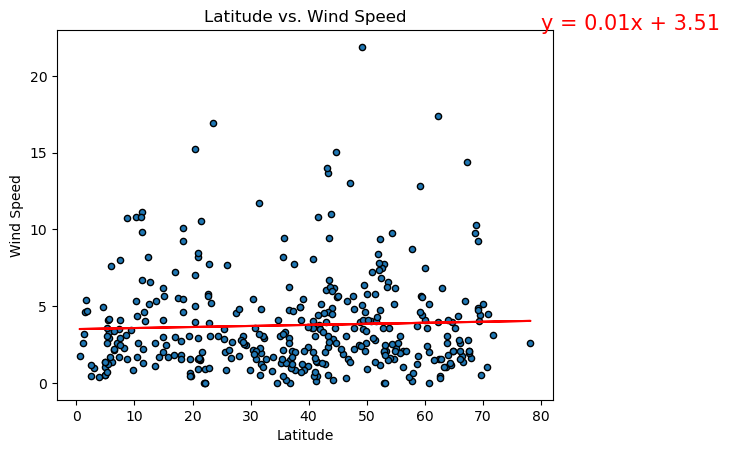

In [99]:
# Northern Hemisphere
# YOUR CODE HERE

northern_hemi_df.plot.scatter("Lat", "Wind Speed", marker="o", edgecolors="black")
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(80,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06898777184827529


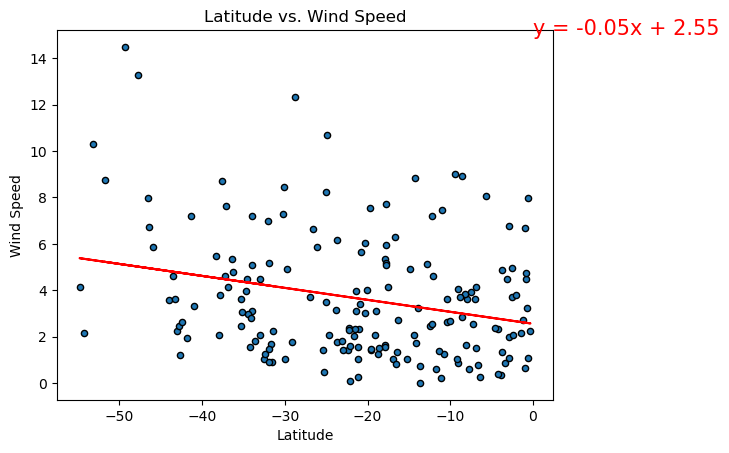

In [101]:
# Southern Hemisphere
# YOUR CODE HERE

southern_hemi_df.plot.scatter("Lat", "Wind Speed", marker="o", edgecolors="black")
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_line = slope * x_value + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_line,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In these graphs comparing latitude and wind speed, we can tell that there is no linear relationship between the two variables. We can confirm that there is no relationship between the two by looking at the low R^2 value. In the graph with data from the Northern hemisphere, we see that there is an R^2 value of 0.0018 while the graph with Souther hemisphere has a R^2 value for the linear regression. Both super low value means that there is no relationship.